COMP 215 - LAB 1
----------------
#### Name:
#### Date:

This lab exercise is mostly to introduce some of the power in Jupyter Notebooks.
Note that a Notebook is composed of "cells" - some are "text", like this one, while others are "code"

We'll also review some basic data types (like `int` and `str`) and data structures (like `list` and `dict`)

**New Python Concepts**:
  * `datetime.date` objects represent a calendar date (these are very powerful)
  * *list comprehension* provides a compact way to represent map and filter algorithms

As will be usual, the fist code cell, below, simply imports all the modules we'll be using...

In [68]:
import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint
import pandas as pd

### API Query

Now, let's fetch some Covid-19 daily case-count data from the Open Covid API:  https://opencovid.ca/api/

Query:
  - `stat=cases`        # the type of data to fetch
  - `loc=BC`            # the location to fetch data for
  - `after=2023-11-01`  # since the 1st of november (note date format:  yyyy-mm-dd)

In [69]:
query = 'https://api.opencovid.ca/timeseries?stat=cases&geo=hr&loc=593&after=2021-01-01'

response = requests.request("GET", query, headers={}, data={})


Notice that the response looks like a dictionary, but is actually just a string of text (most data is exchanged on the web as plain text!).  This particular data format is called "[JSON](https://en.wikipedia.org/wiki/JSON)"

The `json.loads` function "parses" such text and loads the data into a dictionary...

In [70]:
result = json.loads(response.text)


### Extract data items from a list of dictionaries
Next we use "list comprehension" to extract the list of dates and associated cases into "parallel lists"

Notice how we "parse" the date strings, using `strptime`, into a real date objects so they are easier to work with (format: yyyy-mm-dd)

In [71]:
cases = result['data']['cases']
case_dates = [daily['date'] for daily in cases]
n_cases = [daily['value_daily'] for daily in cases]


### Datetime.date
Working with date stings is a pain.  So many formats!  Even within Canada, you might see:
"Jan. 9, 2023" or "09-01-2023" or "2023-01-09" or ....
Imagine trying to do a calculation like "how many days between these 2 dates"!!
The build-in `datetime` package makes working with dates much easier.
  * step 1: "parse" the date string data (`strptime` ==  "string-parse-datetime object")
  * step 2: get the date part (i.e., without the time)

In [72]:

datetime_objects = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in case_dates]
dates = [dt.date() for dt in datetime_objects]

## Exercise 1

In the code cell below, re-write each of the 3 "List Comprehensions" in the code cells above as a loop so you understand how they work.

Notice that a "list comprehension" is a compact way to write a "list accumulator" algorithm (and more efficient too!)

In [73]:
#case_dates = [daily['date'] for daily in cases]
case_dates=[]
for daily in cases:
  case_dates.append(daily['date'])
print(case_dates[:10])
#n_cases = [daily['value_daily'] for daily in cases]
n_cases=[]
for daily in cases:
  n_cases.append(daily['value_daily'])
print(n_cases[:10])
# List comprehensions 3
datetime_objects = []
for date in case_dates:
    datetime_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
    datetime_objects.append(datetime_obj)
dates = []
for dt in datetime_objects:
    dates.append(dt.date())
print(dates[:10])



['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10']
[89, 86, 134, 114, 138, 102, 103, 113, 97, 82]
[datetime.date(2021, 1, 1), datetime.date(2021, 1, 2), datetime.date(2021, 1, 3), datetime.date(2021, 1, 4), datetime.date(2021, 1, 5), datetime.date(2021, 1, 6), datetime.date(2021, 1, 7), datetime.date(2021, 1, 8), datetime.date(2021, 1, 9), datetime.date(2021, 1, 10)]


### Generating a plot

Finally, we'll plot the (dates,cases) data as a nice x-y line graph.

The code to format the x-axis labels is taken from https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html

In [74]:
def format_date_axis(ax):
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)



## Exercise 2

Repeat the analysis above, but this time only for Vancouver Coastal Health Region.

* Make a copy of just the relevant parts of the code above, leaving out all the explanations and extra data dumps.
* You can get the ***hruid*** location code for each health region here:  https://github.com/ccodwg/CovidTimelineCanada/blob/main/geo/hr.csv
* Generalize this code a little to make it easier to repeat the analysis for different locations.  
  If you get that working, also make it easy to run the analysis for different dates?


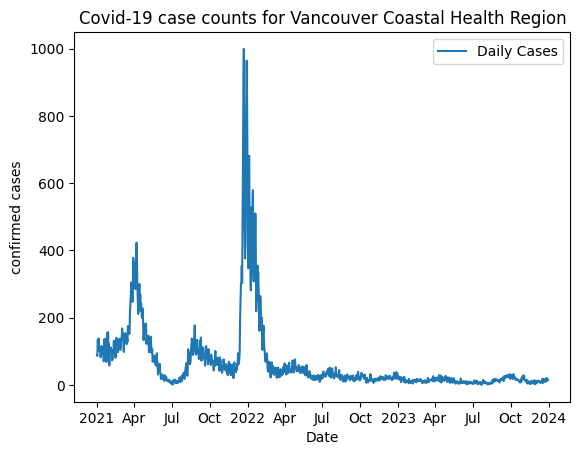

In [75]:
def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates, n_cases, label='Daily Cases')
ax.set(
  title="Covid-19 case counts for Vancouver Coastal Health Region",
  xlabel='Date',
  ylabel='confirmed cases'
)
ax.legend();

## Challenge Exercise - Take your skills to the next level...

## Exercise 3

Notice that the data plot looks quite erratic.  These swings most likely represent artifacts attributable to the reporting process rather than actual changes in infection rates.

 * One way to fix this is is to "smooth" the date with a "7-day rolling average".
Each day, we take the average of the previous 7 days cases.
 * Add new code cell below, compute the 7-day rolling average for each day from the cases list.
 * Create a plot to display the rolling average data and compare your plot with the one produced above.

 Hints: you are free to do this however you like, but a quite elegant solution uses list comprehension, range, and slices

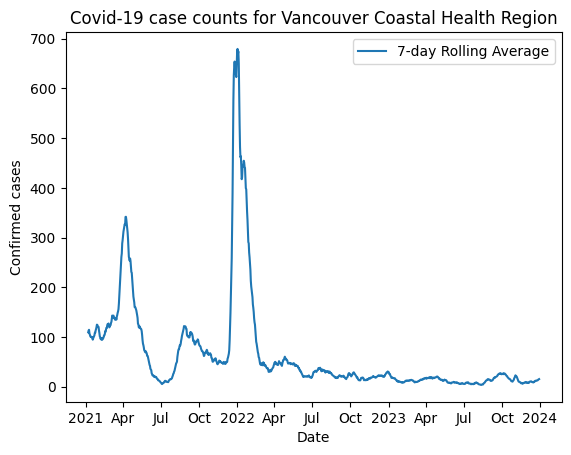

In [76]:
def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

# create a pandas dataframe with the cases data
df = pd.DataFrame({'cases': n_cases, 'dates': case_dates}) # Used Bing AI for these 3 lines of code
df['dates'] = pd.to_datetime(df['dates'])                  # ,,
df['rolling_avg'] = df['cases'].rolling(window=7).mean()   # ,,

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(df['dates'], df['rolling_avg'], label='7-day Rolling Average')
ax.set(
    title="Covid-19 case counts for Vancouver Coastal Health Region",
    xlabel='Date',
    ylabel='Confirmed cases'
)
ax.legend()

plt.show()